# VISUALIZATION OF EVENTS IN HGCAL 

In [1]:
import ROOT
import pandas as pd
import numpy as np 

import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
mpl.rcParams['image.cmap'] = 'hot_r'

Welcome to JupyROOT 6.14/04


In [ ]:
'''
#TBranches containing the 3D TCs' info
branches_tc = ['event', 'tc_id', 'tc_subdet', 'tc_zside', 'tc_layer', 'tc_waferu', 'tc_waferv', 'tc_wafertype', 'tc_panel_number', 'tc_panel_sector', 'tc_cellu', 'tc_cellv', 'tc_data', 'tc_uncompressedCharge', 'tc_compressedCharge',  'tc_pt', 'tc_energy', 'tc_eta', 'tc_phi', 'tc_x', 'tc_y', 'tc_z', 'tc_mipPt', 'tc_cluster_id', 'tc_multicluster_id', 'tc_multicluster_pt']
branches_tc_flatten = ['tc_id', 'tc_subdet', 'tc_zside', 'tc_layer', 'tc_waferu', 'tc_waferv', 'tc_wafertype', 'tc_panel_number', 'tc_panel_sector', 'tc_cellu', 'tc_cellv', 'tc_data', 'tc_uncompressedCharge', 'tc_compressedCharge',  'tc_pt', 'tc_energy', 'tc_eta', 'tc_phi', 'tc_x', 'tc_y', 'tc_z', 'tc_mipPt', 'tc_cluster_id', 'tc_multicluster_id', 'tc_multicluster_pt']

#TBranches containing the 3D clusters' info
branches_cl3d = ['event', 'cl3_id', 'cl3d_pt', 'cl3d_energy', 'cl3d_eta', 'cl3d_phi', 'cl3d_clusters_n', 'cl3d_showerlength', 'cl3d_coreshowerlength',  'cl3d_firstlayer','cl3d_maxlayer','cl3d_seetot', 'cl3d_spptot', 'cl3d_sppmax', 'cl3d_szz', 'cl3d_srrtot', 'cl3d_srrmax', 'cl3d_srrmean',  'cled_emaxe', 'cl3d_hoe', 'cl3d_meanz', 'cl3d_layer10', 'cl3d_layer50', 'cl3d_layer90',  'cl3d_ntc67', 'cl3d_ntc90', 'cl3d_bdteg', 'cl3d_uality']
branches_cl3d_flatten = ['cl3_id', 'cl3d_pt', 'cl3d_energy', 'cl3d_eta', 'cl3d_phi', 'cl3d_clusters_n', 'cl3d_showerlength', 'cl3d_coreshowerlength',  'cl3d_firstlayer','cl3d_maxlayer','cl3d_seetot', 'cl3d_spptot', 'cl3d_sppmax', 'cl3d_szz', 'cl3d_srrtot', 'cl3d_srrmax', 'cl3d_srrmean',  'cled_emaxe', 'cl3d_hoe', 'cl3d_meanz', 'cl3d_layer10', 'cl3d_layer50', 'cl3d_layer90',  'cl3d_ntc67', 'cl3d_ntc90', 'cl3d_bdteg', 'cl3d_uality']

# TBranches containing the gen taus' info
branches_gentau = ['event', 'gentau_pt', 'gentau_eta', 'gentau_phi', 'gentau_energy', 'gentau_mass', 'gentau_vis_pt', 'gentau_vis_eta', 'gentau_vis_phi', 'gentau_vis_energy', 'gentau_vis_mass', 'gentau_decayMode']
branches_gentau_flatten = ['gentau_pt', 'gentau_eta', 'gentau_phi', 'gentau_energy', 'gentau_mass', 'gentau_vis_pt', 'gentau_vis_eta', 'gentau_vis_phi', 'gentau_vis_energy', 'gentau_vis_mass', 'gentau_decayMode']

# TBranches containing the gen jets' info
branches_genjet = ['event', 'genjet_pt', 'genjet_eta', 'genjet_phi', 'genjet_energy', 'genjet_mass']
branches_genjet_flatten = ['genjet_pt', 'genjet_eta', 'genjet_phi', 'genjet_energy', 'genjet_mass']
'''

In [2]:
indir = '/data_CMS_upgrade/motta/HGCAL_SKIMS/SKIM_31Mar2021'
rfile = ROOT.TFile.Open(indir+'/SKIM_RelValTenTau_noPU/mergedOutput.root')
tree = rfile.Get('SkimmedTree')

TAU = True
QCD = False

print(tree.GetEntries())

9000


In [3]:
print('LIST OF ENTRIES WITH ONE TAU PER ENDCAP')
for evt in range(tree.GetEntries()):
    tree.GetEntry(evt)
    l = len(tree.gentau_decayMode)
    if l <= 2 and l > 0: 
        if l == 2:
            gen_eta = tree.gentau_vis_eta
            if gen_eta[0]*gen_eta[1] < 0:
                print(evt, end = ', ')
        else:
            print(evt, end = ', ')

LIST OF ENTRIES WITH ONE TAU PER ENDCAP


0, 3, 5, 7, 8, 15, 18, 22, 30, 31, 35, 38, 40, 41, 45, 47, 48, 50, 51, 54, 57, 58, 62, 73, 75, 78, 88, 94, 102, 104, 117, 125, 136, 137, 140, 144, 145, 153, 161, 165, 167, 168, 169, 170, 174, 178, 184, 188, 196, 206, 207, 210, 214, 220, 223, 226, 232, 235, 236, 241, 245, 246, 248, 249, 257, 258, 259, 260, 268, 274, 276, 281, 286, 288, 291, 295, 297, 301, 302, 303, 308, 309, 310, 313, 316, 322, 323, 326, 329, 331, 339, 348, 350, 352, 356, 357, 358, 372, 378, 400, 401, 409, 410, 413, 420, 421, 422, 434, 436, 437, 439, 442, 443, 444, 448, 453, 455, 457, 460, 464, 466, 472, 482, 486, 491, 496, 497, 504, 505, 508, 509, 512, 516, 519, 523, 525, 529, 535, 541, 548, 549, 558, 564, 569, 574, 577, 580, 585, 590, 600, 601, 602, 606, 609, 623, 628, 630, 632, 635, 637, 638, 641, 644, 652, 653, 656, 658, 666, 667, 671, 675, 676, 677, 685, 698, 699, 702, 703, 704, 710, 711, 712, 714, 719, 720, 724, 725, 730, 731, 733, 738, 739, 744, 745, 749, 750, 759, 761, 764, 775, 787, 793, 796, 803, 804, 808, 811

7074, 7076, 7087, 7089, 7091, 7092, 7093, 7096, 7097, 7101, 7110, 7113, 7116, 7118, 7119, 7121, 7124, 7127, 7129, 7131, 7133, 7137, 7143, 7144, 7151, 7158, 7159, 7161, 7163, 7167, 7168, 7169, 7171, 7172, 7173, 7185, 7186, 7192, 7200, 7202, 7204, 7205, 7219, 7223, 7225, 7234, 7239, 7240, 7242, 7247, 7250, 7251, 7254, 7257, 7258, 7260, 7263, 7273, 7274, 7276, 7278, 7280, 7288, 7289, 7291, 7292, 7293, 7300, 7306, 7316, 7317, 7319, 7323, 7325, 7326, 7327, 7329, 7330, 7334, 7341, 7346, 7348, 7349, 7351, 7359, 7362, 7364, 7366, 7373, 7377, 7381, 7385, 7386, 7389, 7392, 7398, 7402, 7403, 7404, 7405, 7406, 7413, 7415, 7421, 7430, 7438, 7440, 7451, 7459, 7463, 7473, 7474, 7476, 7479, 7480, 7490, 7494, 7497, 7499, 7512, 7514, 7515, 7519, 7531, 7532, 7539, 7540, 7541, 7542, 7543, 7547, 7550, 7551, 7552, 7556, 7557, 7559, 7563, 7569, 7574, 7575, 7583, 7590, 7594, 7602, 7609, 7613, 7615, 7616, 7622, 7625, 7626, 7629, 7638, 7640, 7642, 7646, 7648, 7653, 7663, 7666, 7677, 7681, 7686, 7688, 7690, 7700

In [4]:
print(r'LIST OF ENTRIES WITH ONE TAU PER ENDCAP AND PI0 IN THE DECAY')
for evt in range(tree.GetEntries()):
    tree.GetEntry(evt)
    l = len(tree.gentau_decayMode)
    if l <= 2and l > 0: 
        if l == 2:
            gen_eta = tree.gentau_vis_eta
            gen_dm = tree.gentau_decayMode
            if (gen_eta[0]*gen_eta[1]) < 0 and (gen_dm[0] == 1 or gen_dm[0] == 11) or (gen_dm[1] == 1 or gen_dm[1] == 11 < 0):
                print(evt, end = ', ')
        else:
            gen_dm = tree.gentau_decayMode
            if gen_dm[0] == 1 or gen_dm[0] == 11:
                print(evt, end = ', ')

LIST OF ENTRIES WITH ONE TAU PER ENDCAP AND PI0 IN THE DECAY


0, 5, 7, 8, 15, 18, 22, 29, 30, 35, 38, 39, 40, 45, 47, 48, 50, 51, 54, 57, 58, 62, 73, 75, 77, 78, 88, 94, 102, 104, 111, 117, 125, 127, 136, 137, 140, 142, 144, 145, 153, 161, 167, 168, 169, 170, 174, 178, 188, 196, 201, 206, 207, 214, 220, 226, 232, 235, 236, 241, 245, 246, 248, 249, 256, 257, 258, 259, 260, 262, 274, 276, 281, 286, 288, 291, 295, 297, 301, 303, 308, 309, 313, 316, 319, 322, 323, 326, 329, 340, 346, 348, 350, 352, 357, 358, 367, 369, 372, 375, 378, 400, 401, 409, 410, 413, 415, 420, 421, 423, 434, 437, 439, 442, 443, 444, 453, 455, 457, 460, 464, 466, 472, 482, 486, 496, 504, 505, 508, 509, 512, 516, 519, 525, 541, 548, 549, 550, 558, 564, 569, 574, 577, 580, 584, 585, 590, 593, 600, 601, 602, 606, 608, 609, 623, 630, 635, 637, 641, 644, 652, 653, 656, 658, 662, 666, 667, 671, 674, 675, 676, 677, 685, 698, 699, 702, 703, 710, 711, 714, 719, 720, 724, 725, 730, 731, 744, 745, 749, 750, 756, 759, 761, 764, 772, 775, 787, 793, 796, 803, 804, 808, 811, 814, 820, 821, 82

, 7293, 7300, 7306, 7316, 7317, 7318, 7319, 7323, 7325, 7326, 7327, 7329, 7330, 7334, 7341, 7346, 7348, 7349, 7351, 7359, 7362, 7364, 7366, 7373, 7378, 7385, 7386, 7389, 7392, 7398, 7404, 7405, 7406, 7415, 7421, 7428, 7438, 7439, 7440, 7451, 7459, 7463, 7473, 7474, 7476, 7479, 7480, 7490, 7494, 7497, 7499, 7500, 7511, 7512, 7515, 7531, 7532, 7539, 7540, 7541, 7542, 7543, 7547, 7550, 7551, 7552, 7557, 7559, 7563, 7569, 7574, 7575, 7583, 7590, 7594, 7602, 7609, 7615, 7622, 7626, 7629, 7638, 7640, 7642, 7646, 7648, 7653, 7654, 7663, 7677, 7681, 7686, 7688, 7690, 7700, 7705, 7706, 7707, 7709, 7713, 7717, 7718, 7728, 7732, 7734, 7738, 7740, 7742, 7746, 7751, 7752, 7757, 7759, 7761, 7762, 7772, 7774, 7775, 7788, 7790, 7793, 7794, 7803, 7806, 7809, 7811, 7814, 7815, 7816, 7817, 7821, 7823, 7837, 7838, 7839, 7843, 7845, 7848, 7850, 7856, 7857, 7859, 7864, 7866, 7867, 7872, 7880, 7892, 7901, 7903, 7906, 7907, 7908, 7911, 7913, 7920, 7921, 7922, 7923, 7927, 7930, 7933, 7939, 7943, 7944, 7949, 79

In [5]:
# declaration of C++ functions to do the selection of which endcup to choose (+1/-1)

ROOT.gInterpreter.Declare('''
vector<float> sideChoice (vector<int> zside, vector<float> tochoose, vector<unsigned int> tcID, vector<unsigned int> clID, int side){
    vector<float> tosave;

    for (int i=0; i<zside.size(); i++){
        if (zside[i] * side < 0) continue;
        
        for (int j=0; j<clID.size();j++){
            if (tcID[i] != clID[j]) continue;
            
            tosave.push_back(tochoose[i]);
        }
    }
    
    return tosave;
}

vector<int> sideChoice (vector<int> zside, vector<int> tochoose, vector<unsigned int> tcID, vector<unsigned int> clID, int side){
    vector<int> tosave;

    for (int i=0; i<zside.size(); i++){
        if (zside[i] * side < 0) continue;
        for (int j=0; j<clID.size();j++){
            if (tcID[i] != clID[j]) continue;
            
            tosave.push_back(tochoose[i]);
        }
    }
    
    return tosave;
}

vector<unsigned int> sideChoice (vector<int> zside, vector<unsigned int> tochoose, vector<unsigned int> tcID, vector<unsigned int> clID, int side){
    vector<unsigned int> tosave;

    for (int i=0; i<zside.size(); i++){
        if (zside[i] * side < 0) continue;
        for (int j=0; j<clID.size();j++){
            if (tcID[i] != clID[j]) continue;
            
            tosave.push_back(tochoose[i]);
        }
    }
    
    return tosave;
}

// --------------------------------------------------------------------------------------------------------------------------------------------------------
// --------------------------------------------------------------------------------------------------------------------------------------------------------

vector<float> sideChoice (vector<int> zside, vector<float> tochoose, vector<unsigned int> tcID, int side){
    vector<float> tosave;

    for (int i=0; i<zside.size(); i++){
        if (zside[i] * side < 0) continue;
            
        tosave.push_back(tochoose[i]);
    }
    
    return tosave;
}

vector<int> sideChoice (vector<int> zside, vector<int> tochoose, vector<unsigned int> tcID, int side){
    vector<int> tosave;

    for (int i=0; i<zside.size(); i++){
        if (zside[i] * side < 0) continue;
        
        tosave.push_back(tochoose[i]);
    }
    
    return tosave;
}

vector<unsigned int> sideChoice (vector<int> zside, vector<unsigned int> tochoose, vector<unsigned int> tcID, int side){
    vector<unsigned int> tosave;

    for (int i=0; i<zside.size(); i++){
        if (zside[i] * side < 0) continue;
        
        tosave.push_back(tochoose[i]);
    }
    
    return tosave;
}

// --------------------------------------------------------------------------------------------------------------------------------------------------------
// --------------------------------------------------------------------------------------------------------------------------------------------------------

vector<float> vectorRatio(vector<float> num, vector<float> denom){
    vector<float> tosave;
    
    if (num.size() != denom.size()){ exit(-1);}
    
    for (int i=0; i<num.size(); i++){
        tosave.push_back(num[i]/denom[i]);
    }
    
    return tosave;
}

''')

True

In [17]:
entry = 5 # this is the entry number [0,nEntries] NOT the event number
tree.GetEntry(entry)

19010

In [18]:
if TAU:
    gen_dm = tree.gentau_decayMode 
    print('FOUND',len(gen_dm),'TAUS IN THIS EVENT')
    gen_pt = tree.gentau_pt
    gen_eta = tree.gentau_eta
    gen_phi = tree.gentau_phi
    gen_mass = tree.gentau_mass
elif QCD:
    gen_dm = -2*np.sgn(tree.genjet_pt)
    gen_pt = tree.genjet_pt
    gen_eta = tree.genjet_eta
    gen_phi = tree.genjet_phi
    gen_mass = tree.genjet_mass

gen_dict = {}

for i in range(len(gen_pt)):
    gen_dict[i] = {'DM': {}, 'v4': {}}
    gen_dict[i]['DM'] = gen_dm[i]
    gen_dict[i]['v4'] = ROOT.TLorentzVector()
    gen_dict[i]['v4'].SetPtEtaPhiM(gen_pt[i],gen_eta[i],gen_phi[i],gen_mass[i])

FOUND 1 TAUS IN THIS EVENT


In [19]:
'''
# MATCH TCs AND Cl3D ID

# choose the endcap we want to look at and store all the needed info for the display

event = tree.event 
side = -1
zside = tree.tc_zside
clID = tree.cl3d_id
tcID = tree.tc_multicluster_id

x         = ROOT.sideChoice(zside, tree.tc_x,               tcID, clID, side)
y         = ROOT.sideChoice(zside, tree.tc_y,               tcID, clID, side)
z         = ROOT.sideChoice(zside, tree.tc_z,               tcID, clID, side)
layer     = ROOT.sideChoice(zside, tree.tc_layer,           tcID, clID, side)
clusterID = ROOT.sideChoice(zside, tree.tc_multicluster_id, tcID, clID, side)
energy    = ROOT.sideChoice(zside, tree.tc_energy,          tcID, clID, side)
'''

'\n# MATCH TCs AND Cl3D ID\n\n# choose the endcap we want to look at and store all the needed info for the display\n\nevent = tree.event \nside = -1\nzside = tree.tc_zside\nclID = tree.cl3d_id\ntcID = tree.tc_multicluster_id\n\nx         = ROOT.sideChoice(zside, tree.tc_x,               tcID, clID, side)\ny         = ROOT.sideChoice(zside, tree.tc_y,               tcID, clID, side)\nz         = ROOT.sideChoice(zside, tree.tc_z,               tcID, clID, side)\nlayer     = ROOT.sideChoice(zside, tree.tc_layer,           tcID, clID, side)\nclusterID = ROOT.sideChoice(zside, tree.tc_multicluster_id, tcID, clID, side)\nenergy    = ROOT.sideChoice(zside, tree.tc_energy,          tcID, clID, side)\n'

In [23]:
# DO NOT MATCH TCs AND Cl3D ID

# choose the endcap we want to look at and store all the needed info for the display

event = tree.event 
side = 1
zside = tree.tc_zside
tcID = tree.tc_multicluster_id

x         = ROOT.sideChoice(zside, tree.tc_x,               tcID, side)
y         = ROOT.sideChoice(zside, tree.tc_y,               tcID, side)
z         = ROOT.sideChoice(zside, tree.tc_z,               tcID, side)
layer     = ROOT.sideChoice(zside, tree.tc_layer,           tcID, side)
clusterID = ROOT.sideChoice(zside, tree.tc_multicluster_id, tcID, side)
energy    = ROOT.sideChoice(zside, tree.tc_energy,          tcID, side)

In [24]:
print(len(x))

63


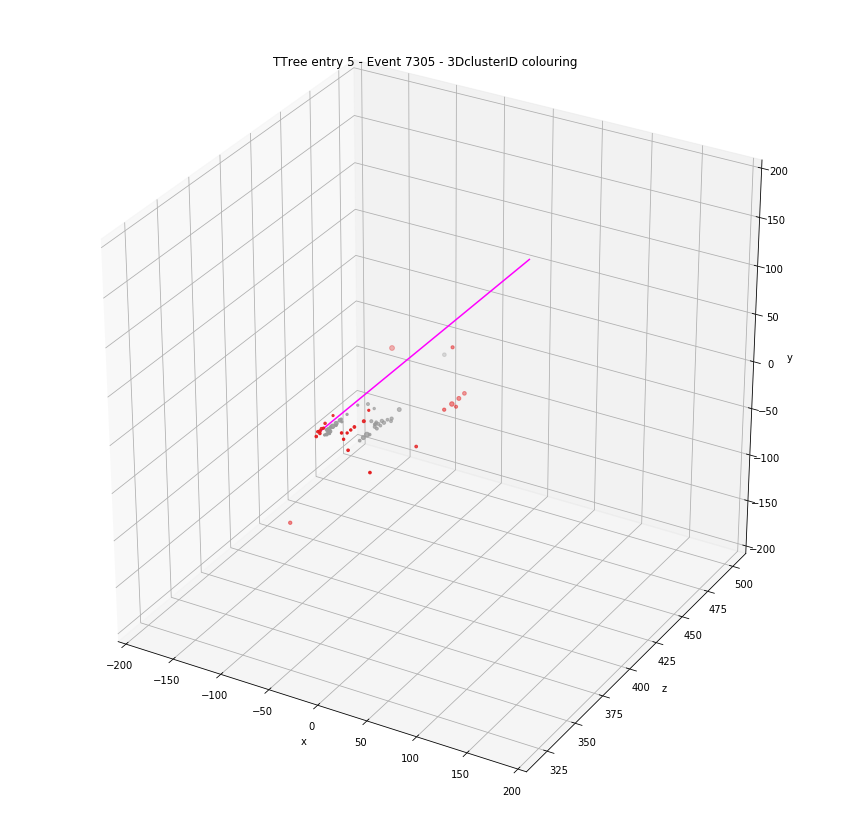

In [25]:
fig = plt.figure(figsize = (15, 15))
ax2 = fig.add_subplot(111, projection='3d')
cmap = 'Set1'

s = np.sqrt(energy)*10
c = np.sqrt(clusterID)*1e-3

ax2.scatter(x, z, y, c = c, s = s, marker = 'o', cmap = cmap)
for i in gen_dict:
    gen_x = gen_dict[i]['v4'].Px()
    gen_y = gen_dict[i]['v4'].Py()
    gen_z = gen_dict[i]['v4'].Pz()
    gen_dm = gen_dict[i]['DM']
    gen_eta_sig = np.sign(gen_dict[i]['v4'].Eta())
    up_scale = 500/gen_z
    down_scale = 320/gen_z
    if gen_dm == 0: gen_c = 'limegreen'; lab =' 1-prong'
    elif gen_dm == 1: gen_c = 'blue'; lab =' 1-prong + \pi^0'
    elif gen_dm == 10: gen_c = 'orange'; lab =' 3-prong'
    elif gen_dm == 11: gen_c = 'fuchsia'; lab =' 3-prong + \pi^0'
    elif gen_dm == -2: gen_c = 'cyan'; lab =' QCD'
    if side*gen_eta_sig > 0:
        #r = 0.3 * 4 * tau_dict[i]['v4'].Pt()
        #zetas = np.linspace(tau_z*tau_eta_sig*down_scale,tau_z*tau_eta_sig*up_scale,1000)
        #ax2.plot(np.sin(zetas) * r,zetas,np.cos(zetas) * r, c = gen_c) #, label = r"$\tau_{gen}: %s"%lab)

        ax2.plot([gen_x,gen_x],[gen_z*gen_eta_sig*down_scale,gen_z*gen_eta_sig*up_scale],[gen_y,gen_y], c = gen_c) #, label = r"$\tau_{gen}: %s"%lab)

#plt.legend(loc = 'upper left', fontsize=15)
        
ax2.set_xlabel('x'); ax2.set_ylabel('z'); ax2.set_zlabel('y')
ax2.set_xlim(-200,200); ax2.set_zlim(-200,200)
ax2.set_title('TTree entry %i - Event %i - 3DclusterID colouring' % (entry, event))

fig.show()

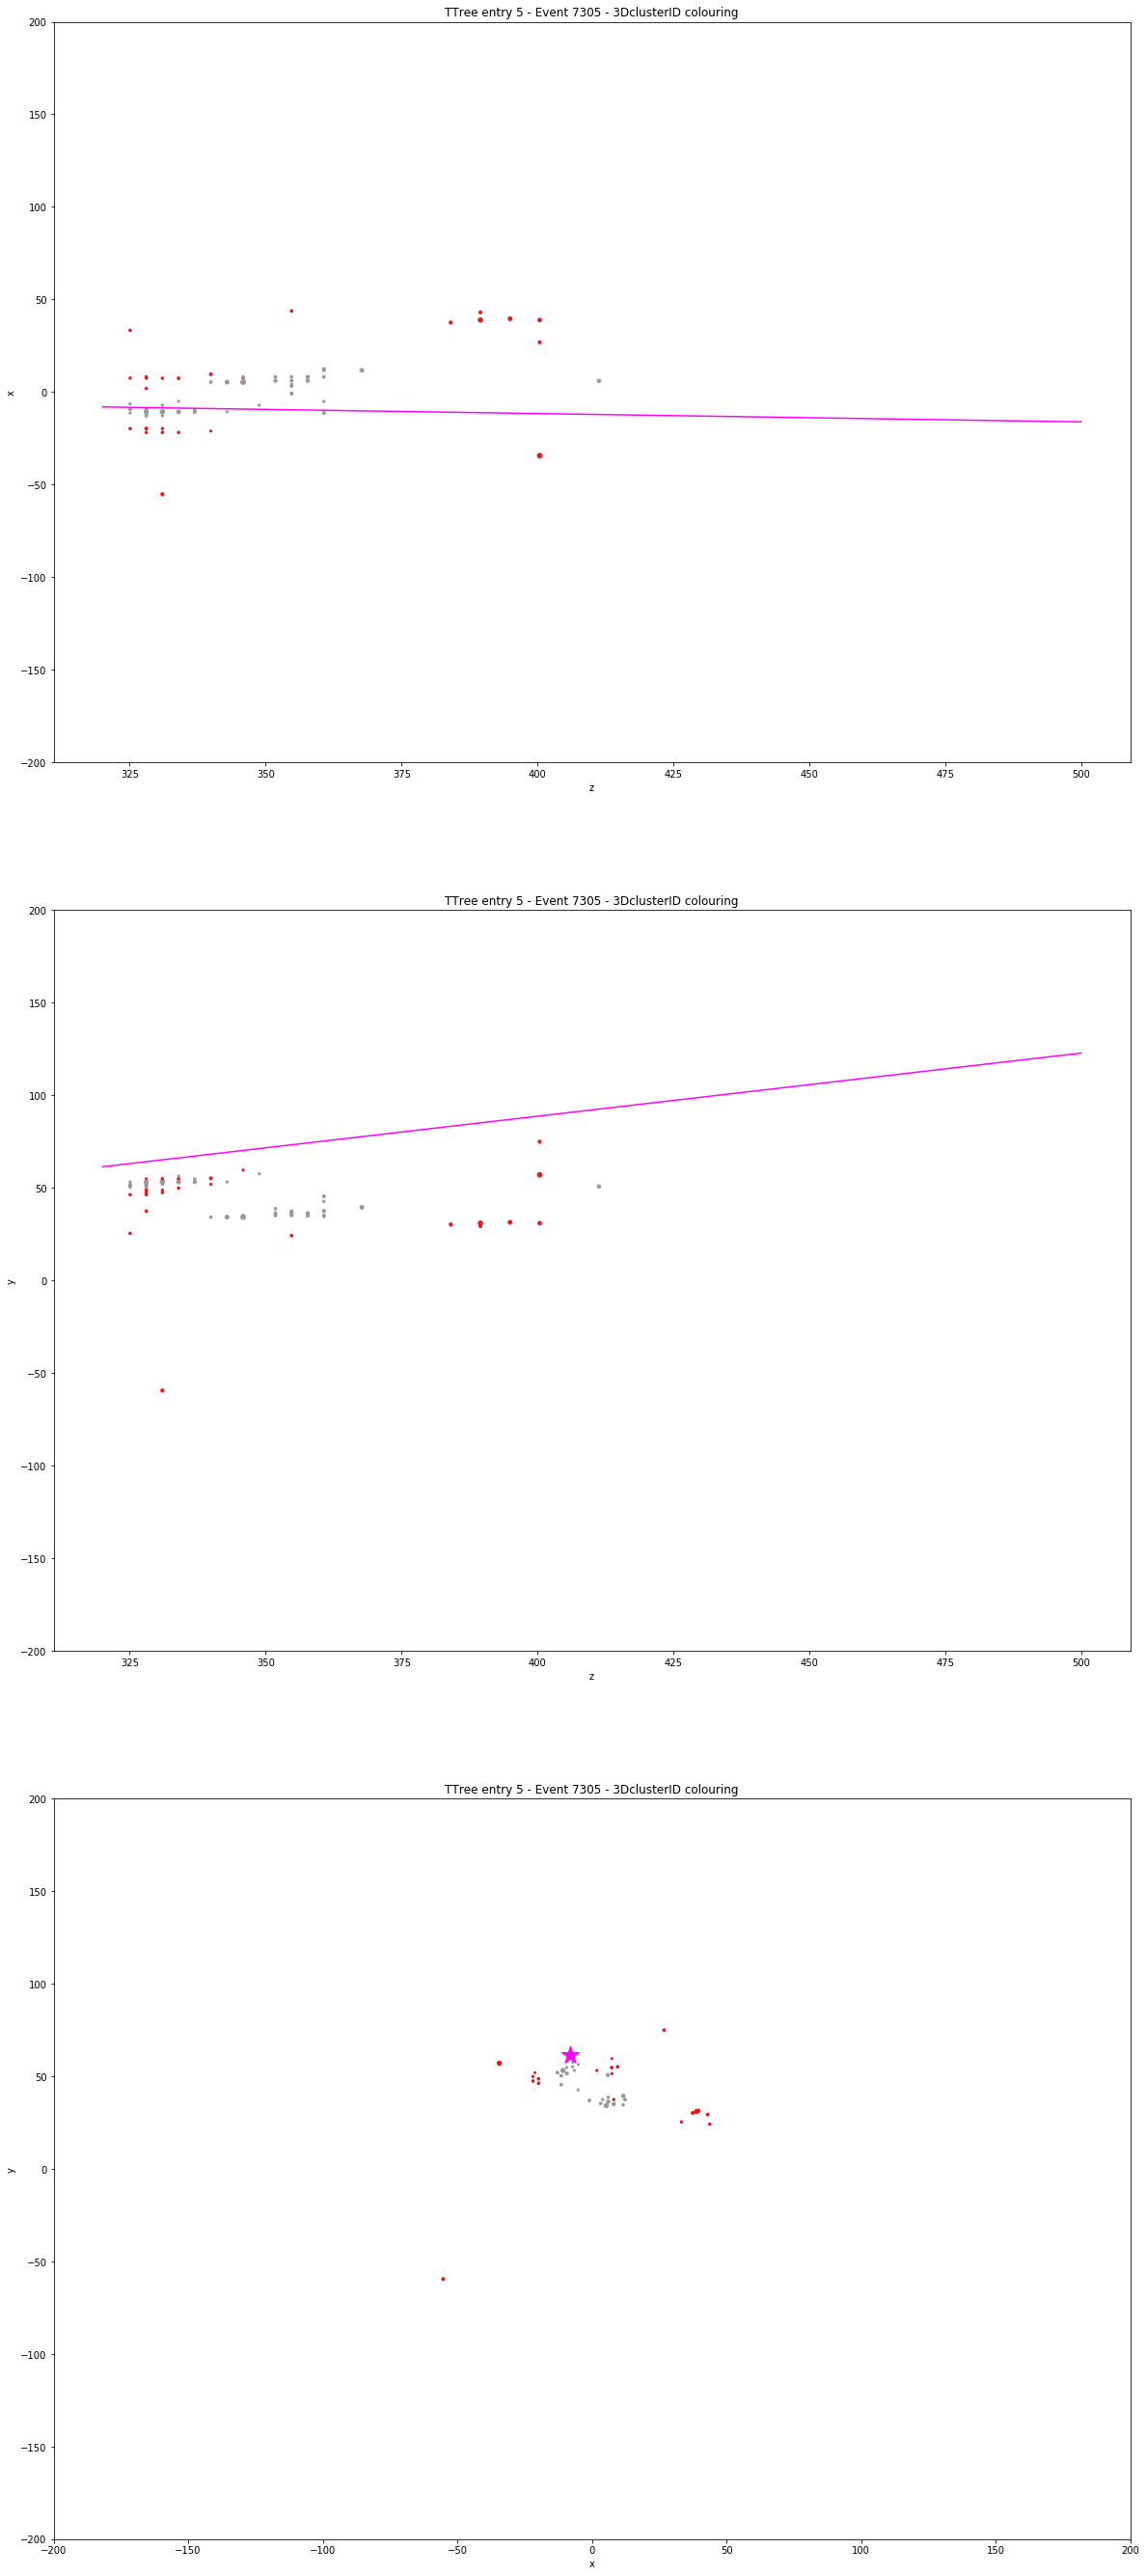

In [26]:
fig = plt.figure(figsize = (20,48))
ax2 = fig.add_subplot(311)
ax3 = fig.add_subplot(312)
ax4 = fig.add_subplot(313)

cmap = 'Set1'

c = clusterID
s = np.sqrt(energy)*10

m_style = 'o'
ax2.scatter(z, x, c = c, s = s, marker = m_style, cmap = cmap)
ax3.scatter(z, y, c = c, s = s, marker = m_style, cmap = cmap)    
m_style = 'H'
ax4.scatter(x, y, c = c, s = s, marker = m_style, cmap = cmap)


for i in gen_dict:
    gen_x = gen_dict[i]['v4'].Px()
    gen_y = gen_dict[i]['v4'].Py()
    gen_z = gen_dict[i]['v4'].Pz()
    gen_e = gen_dict[i]['v4'].E()
    gen_eta_sig = np.sign(gen_dict[i]['v4'].Eta())
    gen_dm = gen_dict[i]['DM']
    up_scale = 500/gen_z
    down_scale = 320/gen_z
    if gen_dm == 0: gen_c = 'limegreen'; lab=' 1-prong'
    elif gen_dm == 1: gen_c = 'blue'; lab=' 1-prong + \pi^0'
    elif gen_dm == 10: gen_c = 'orange'; lab=' 3-prong'
    elif gen_dm == 11: gen_c = 'fuchsia'; lab=' 3-prong + \pi^0'
    elif gen_dm == -2: gen_c = 'cyan'; lab='QCD'
    if side*gen_eta_sig > 0: 
        
        ax2.plot([gen_z*gen_eta_sig*down_scale,gen_z*gen_eta_sig*up_scale],[gen_x,gen_x*2], c = gen_c) #, label = r"$\tau_{gen}: %s"%lab)
        ax3.plot([gen_z*gen_eta_sig*down_scale,gen_z*gen_eta_sig*up_scale],[gen_y,gen_y*2], c = gen_c) #, label = r"$\tau_{gen}: %s"%lab)
        ax4.scatter([gen_x],[gen_y], marker='*', c = gen_c, s=gen_e) #, label = r"$\tau_{gen}: %s$"%lab)

#if side < 0: plt.legend(loc = 'upper left', fontsize=15)
#else: plt.legend(loc = 'upper right', fontsize=15)
    
    
ax2.set_xlabel('z'); ax2.set_ylabel('x')
ax2.set_ylim(-200,200); ax4.set_xlim(-200,200)
ax3.set_xlabel('z'); ax3.set_ylabel('y')
ax3.set_ylim(-200,200); ax4.set_xlim(-200,200)
ax4.set_xlabel('x'); ax4.set_ylabel('y')
ax4.set_ylim(-200,200); ax4.set_xlim(-200,200)

#fig.suptitle('Event %i' % event)#, fontsize=16)
ax2.set_title('TTree entry %i - Event %i - 3DclusterID colouring' % (entry, event))
ax3.set_title('TTree entry %i - Event %i - 3DclusterID colouring' % (entry, event))
ax4.set_title('TTree entry %i - Event %i - 3DclusterID colouring' % (entry, event))

fig.show()

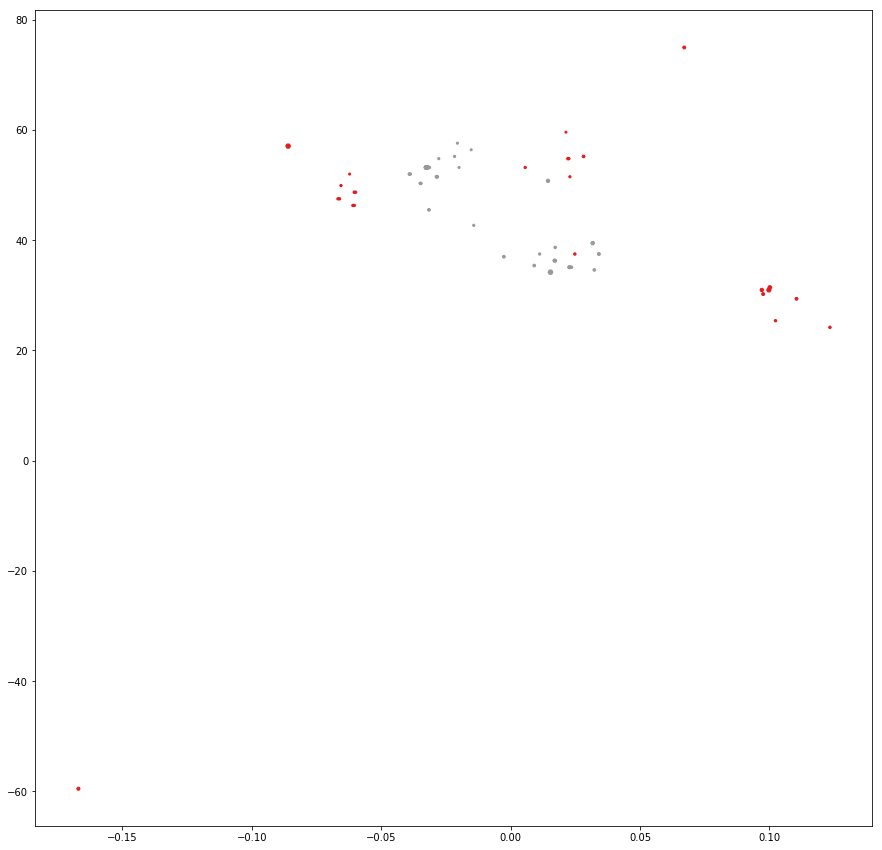

In [30]:
fig = plt.figure(figsize = (15,15))
ax4 = fig.add_subplot(111)

cmap = 'Set1'

c = clusterID
s = np.sqrt(energy)*10

m_style = 'H'
ax4.scatter(ROOT.vectorRatio(x,z), ROOT.vectorRatio(y,z), c = c, s = s, marker = m_style, cmap = cmap)

# ------------------------------------------------------
# ------------------------------------------------------

## TEST STUFF THAT IS NOT WORKING

In [ ]:
ROOT.ROOT.EnableImplicitMT(1)
df = ROOT.RDataFrame("SkimmedTree", indir+'/SKIM_RelValTenTau_PU200/mergedOutput.root')

In [ ]:
df_z = df.Filter("tc_zside > 0")
report = df_z.Report()
report.Print()

In [ ]:
print(len(clusterID))

In [ ]:
ROOT.gInterpreter.Declare('''
vector< vector<float> > zSideSelection(string file_name, string tree_name, int entry) {
    cout << "here 1" << endl;
    TFile rfile(file_name.c_str());
    TTree * tree = (TTree *)rfile.Get(tree_name.c_str());
    cout << "here 2" << endl;
    vector< vector<float> > out;
    vector<float> out_tc_x;
    vector<float> out_tc_y;
    vector<float> out_tc_z;
    vector<float> out_tc_layer;
    vector<float> out_tc_cluster_id;
    vector<float> out_tc_energy;
    cout << "here 3" << endl;
    vector<float> *in_tc_x;
    vector<float> *in_tc_y;
    vector<float> *in_tc_z;
    vector<float> *in_tc_layer;
    vector<float> *in_tc_cluster_id;
    vector<float> *in_tc_energy;
    vector<float> *in_tc_zside;
    cout << "here 4" << endl;
    tree->SetBranchAddress("tc_x", &in_tc_x);
    tree->SetBranchAddress("tc_y", &in_tc_y);
    tree->SetBranchAddress("tc_z", &in_tc_z);
    tree->SetBranchAddress("tc_layer", &in_tc_layer);
    tree->SetBranchAddress("tc_cluster_id", &in_tc_cluster_id);
    tree->SetBranchAddress("tc_energy", &in_tc_energy);
    tree->SetBranchAddress("tc_zside", &in_tc_zside);
    
    cout << "here 5" << endl;
    int entry_ok = tree->GetEntry((Long64_t)entry);
    cout << "here 6" << endl;
    if(entry_ok<0) {
        cout << "ENTRY " << entry << " NOT FOUND. MAX NUMBER OF ENTRIES IS " << tree->GetEntries() << endl;
        return out;
    }

    int tcs = (*in_tc_zside).size();

    cout << (*in_tc_zside).size() << endl;

    for (int i=0; i<tcs; i++){
        if ((*in_tc_zside)[i] < 0) continue;
        out_tc_x.push_back((*in_tc_x)[i]);
        out_tc_y.push_back((*in_tc_y)[i]);
        out_tc_z.push_back((*in_tc_z)[i]);
        out_tc_layer.push_back((*in_tc_layer)[i]);
        out_tc_cluster_id.push_back((*in_tc_cluster_id)[i]);
        out_tc_energy.push_back((*in_tc_energy)[i]);
    }

    out.push_back(out_tc_x);
    out.push_back(out_tc_y);
    out.push_back(out_tc_z);
    out.push_back(out_tc_layer);
    out.push_back(out_tc_cluster_id);
    out.push_back(out_tc_energy);
    
    return out;    
}
''')

indir = '/data_CMS_upgrade/motta/HGCAL_SKIMS/SKIM_18Feb2021'
rfile = indir+'/SKIM_GluGluHHTo2b2Tau_PU200/mergedOutput.root'
tree = 'SkimmedTree'
entry = 1000

xyzlie_vector = ROOT.zSideSelection(rfile, tree, entry)
print(len(xyzlie_vector))